***IRIS Clustering***

In this tutorial, we will learn how to do clustering using scikit-learn. There are 3 classes and 150 examples in total. Each example is an 1 * 4 vector.

importing necessary modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import datasets
from sklearn import tree
from sklearn.metrics.cluster import homogeneity_score

#np.random.seed(5)

Next let us load iris dataset

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

Further we build the model

In [6]:
#model = KMeans(n_clusters=3, random_state=1)
model = DBSCAN(eps=0.4, min_samples=4)

In this case we use all the datapoints to cluster.

In [7]:
model.fit(X)
#tree.export_graphviz(model,out_file='decision_rules.out')

DBSCAN(algorithm='auto', eps=0.4, leaf_size=30, metric='euclidean',
    min_samples=4, n_jobs=1, p=None)

In [8]:
labels = model.labels_

In [9]:
print(labels)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0 -1  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0
  1  1  1  1  1  1  1  3  1  1  3  1 -1  1 -1  1  1  1 -1  1  2  1  2  1  1
  1  1  1  1  1  1  1  1  2  1 -1  1 -1  1  1  1  1  1  3  1  1  1  1  3  1
 -1  2  2  2  2 -1 -1 -1 -1 -1  2  2  2  2 -1  2  2 -1 -1 -1  2  2 -1  2  2
 -1  2  2  2 -1 -1 -1  2  2 -1 -1  2  2  2  2  2  2  2  2  2  2  2  2  2  2]


Plotting the dataset

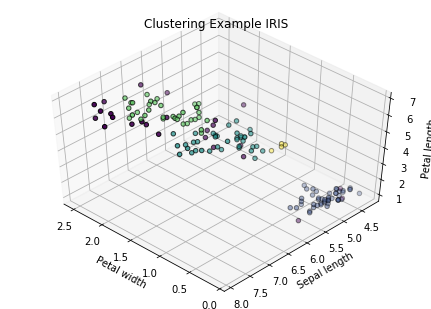

In [10]:
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Clustering Example IRIS')
plt.show()

In [11]:
#Predict cluster labels for data points fit_predict works only for DBSCAN
#model.predict(X[:4])
model.fit_predict(X)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  3,  1,  1,  3,  1, -1,  1, -1,  1,  1,  1,
       -1,  1,  2,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,
       -1,  1, -1,  1,  1,  1,  1,  1,  3,  1,  1,  1,  1,  3,  1, -1,  2,
        2,  2,  2, -1, -1, -1, -1, -1,  2,  2,  2,  2, -1,  2,  2, -1, -1,
       -1,  2,  2, -1,  2,  2, -1,  2,  2,  2, -1, -1, -1,  2,  2, -1, -1,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2])

In [71]:
#Cluster Centers !!!!only for kmeans!!!!
model.cluster_centers_

AttributeError: 'DBSCAN' object has no attribute 'cluster_centers_'

Homogeneity score is a measure of how homogenous the clusters are.

In [12]:
homogeneity_score(labels_pred = labels, labels_true = y)

0.81012204786378983

In [13]:
#DBSCAN doesn't take in n_clusters as hyperparameter and this is inferred
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)

4


In [14]:
#model selection
performance_scores = []
n_choices = 25
for k in range(1,n_choices):
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(X)
    labels = model.labels_
    performance_scores+=[homogeneity_score(labels_pred = labels, labels_true = y)]
    

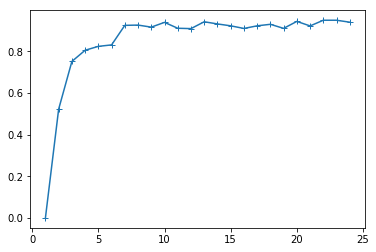

In [15]:
plt.plot(range(1,n_choices),performance_scores, marker = '+')
plt.show()